# Práctica 6 - Operaciones con DataFrames y transformaciones de datos

In [1]:
import seaborn as sns
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np
import pandas as pd
import seaborn.objects as so
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from formulaic import model_matrix

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

## Ejercicio 1

In [3]:
penguins[(penguins["island"]=="Biscoe") & (penguins["bill_length_mm"]>48)]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
221  Gentoo  Biscoe            50.0           16.3              230.0   
222  Gentoo  Biscoe            48.7           14.1              210.0   
223  Gentoo  Biscoe            50.0           15.2              218.0   
231  Gentoo  Biscoe            49.0           16.1              216.0   
233  Gentoo  Biscoe            48.4           14.6              213.0   
235  Gentoo  Biscoe            49.3           15.7              217.0   
237  Gentoo  Biscoe            49.2           15.2              221.0   
239  Gentoo  Biscoe            48.7           15.1              222.0   
240  Gentoo  Biscoe            50.2           14.3              218.0   
248  Gentoo  Biscoe            48.2           14.3              210.0   
249  Gentoo  Biscoe            50.0           15.3              220.0   
253  Gentoo  Biscoe            59.6           17.0              230.0   
254  Gentoo  Biscoe            49.1           14.8              220.0   
255  Gentoo  Biscoe            48.4           16.3              220.0   
259  Gentoo  Biscoe            48.7           15.7              208.0   
261  Gentoo  Biscoe            49.6           16.0              225.0   
263  Gentoo  Biscoe            49.6           15.0              216.0   
264  Gentoo  Biscoe            50.5           15.9              222.0   
267  Gentoo  Biscoe            50.5           15.9              225.0   
271  Gentoo  Biscoe            48.5           14.1              220.0   
273  Gentoo  Biscoe            50.1           15.0              225.0   
279  Gentoo  Biscoe            50.4           15.3              224.0   
283  Gentoo  Biscoe            54.3           15.7              231.0   
285  Gentoo  Biscoe            49.8           16.8              230.0   
287  Gentoo  Biscoe            49.5           16.2              229.0   
289  Gentoo  Biscoe            50.7           15.0              223.0   
292  Gentoo  Biscoe            48.2           15.6              221.0   
295  Gentoo  Biscoe            48.6           16.0              230.0   
297  Gentoo  Biscoe            51.1           16.3              220.0   
300  Gentoo  Biscoe            49.1           14.5              212.0   
301  Gentoo  Biscoe            52.5           15.6              221.0   
303  Gentoo  Biscoe            50.0           15.9              224.0   
305  Gentoo  Biscoe            50.8           17.3              228.0   
307  Gentoo  Biscoe            51.3           14.2              218.0   
309  Gentoo  Biscoe            52.1           17.0              230.0   
311  Gentoo  Biscoe            52.2           17.1              228.0   
313  Gentoo  Biscoe            49.5           16.1              224.0   
315  Gentoo  Biscoe            50.8           15.7              226.0   
316  Gentoo  Biscoe            49.4           15.8              216.0   
318  Gentoo  Biscoe            48.4           14.4              203.0   
319  Gentoo  Biscoe            51.1           16.5              225.0   
320  Gentoo  Biscoe            48.5           15.0              219.0   
321  Gentoo  Biscoe            55.9           17.0              228.0   
323  Gentoo  Biscoe            49.1           15.0              228.0   
327  Gentoo  Biscoe            53.4           15.8              219.0   
329  Gentoo  Biscoe            48.1           15.1              209.0   
330  Gentoo  Biscoe            50.5           15.2              216.0   
331  Gentoo  Biscoe            49.8           15.9              229.0   
333  Gentoo  Biscoe            51.5           16.3              230.0   
335  Gentoo  Biscoe            55.1           16.0              230.0   
337  Gentoo  Biscoe            48.8           16.2              222.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
221       5700.0    Male  
222    

## Ejercicio 2

In [4]:
ejercicio2 = penguins[(penguins["species"]=="Adelie") & (penguins["sex"]=="Male") & (penguins["island"]!="Biscoe")]
ejercicio2

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
7    Adelie  Torgersen            39.2           19.6              195.0   
13   Adelie  Torgersen            38.6           21.2              191.0   
14   Adelie  Torgersen            34.6           21.1              198.0   
17   Adelie  Torgersen            42.5           20.7              197.0   
19   Adelie  Torgersen            46.0           21.5              194.0   
31   Adelie      Dream            37.2           18.1              178.0   
33   Adelie      Dream            40.9           18.9              184.0   
35   Adelie      Dream            39.2           21.1              196.0   
36   Adelie      Dream            38.8           20.0              190.0   
39   Adelie      Dream            39.8           19.1              184.0   
41   Adelie      Dream            40.8           18.4              195.0   
43   Adelie      Dream            44.1           19.7              196.0   
45   Adelie      Dream            39.6           18.8              190.0   
46   Adelie      Dream            41.1           19.0              182.0   
49   Adelie      Dream            42.3           21.2              191.0   
69   Adelie  Torgersen            41.8           19.4              198.0   
71   Adelie  Torgersen            39.7           18.4              190.0   
73   Adelie  Torgersen            45.8           18.9              197.0   
75   Adelie  Torgersen            42.8           18.5              195.0   
77   Adelie  Torgersen            37.2           19.4              184.0   
79   Adelie  Torgersen            42.1           19.1              195.0   
81   Adelie  Torgersen            42.9           17.6              196.0   
83   Adelie  Torgersen            35.1           19.4              193.0   
85   Adelie      Dream            41.3           20.3              194.0   
86   Adelie      Dream            36.3           19.5              190.0   
88   Adelie      Dream            38.3           19.2              189.0   
91   Adelie      Dream            41.1           18.1              205.0   
93   Adelie      Dream            39.6           18.1              186.0   
95   Adelie      Dream            40.8           18.9              208.0   
97   Adelie      Dream            40.3           18.5              196.0   
99   Adelie      Dream            43.2           18.5              192.0   
117  Adelie  Torgersen            37.3           20.5              199.0   
119  Adelie  Torgersen            41.1           18.6              189.0   
121  Adelie  Torgersen            37.7           19.8              198.0   
123  Adelie  Torgersen            41.4           18.5              202.0   
125  Adelie  Torgersen            40.6           19.0              199.0   
127  Adelie  Torgersen            41.5           18.3              195.0   
129  Adelie  Torgersen            44.1           18.0              210.0   
131  Adelie  Torgersen            43.1           19.2              197.0   
133  Adelie      Dream            37.5           18.5              199.0   
135  Adelie      Dream            41.1           17.5              190.0   
137  Adelie      Dream            40.2           20.1              200.0   
139  Adelie      Dream            39.7           17.9              193.0   
141  Adelie      Dream            40.6           17.2              187.0   
143  Adelie      Dream            40.7           17.0              190.0   
145  Adelie      Dream            39.0           18.7              185.0   
146  Adelie      Dream            39.2           18.6              190.0   
149  Adelie      Dream            37.8           18.1              193.0   
151  Adelie      Dream            41.5           18.5              201.0   

     body_mass_g   sex  
0         3750.0  Male  
5

## Ejercicio 3

In [5]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [6]:
[col for col in penguins.columns if not(col in ['year','sex','body_mass_g'])]

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

In [7]:
penguins[[col for col in penguins.columns if not(col in ['year','sex','body_mass_g'])]]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm
0    Adelie  Torgersen            39.1           18.7              181.0
1    Adelie  Torgersen            39.5           17.4              186.0
2    Adelie  Torgersen            40.3           18.0              195.0
3    Adelie  Torgersen             NaN            NaN                NaN
4    Adelie  Torgersen            36.7           19.3              193.0
..      ...        ...             ...            ...                ...
339  Gentoo     Biscoe             NaN            NaN                NaN
340  Gentoo     Biscoe            46.8           14.3              215.0
341  Gentoo     Biscoe            50.4           15.7              222.0
342  Gentoo     Biscoe            45.2           14.8              212.0
343  Gentoo     Biscoe            49.9           16.1              213.0

[344 rows x 5 columns]

In [8]:
penguins.drop(['sex','body_mass_g'],axis=1)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm
0    Adelie  Torgersen            39.1           18.7              181.0
1    Adelie  Torgersen            39.5           17.4              186.0
2    Adelie  Torgersen            40.3           18.0              195.0
3    Adelie  Torgersen             NaN            NaN                NaN
4    Adelie  Torgersen            36.7           19.3              193.0
..      ...        ...             ...            ...                ...
339  Gentoo     Biscoe             NaN            NaN                NaN
340  Gentoo     Biscoe            46.8           14.3              215.0
341  Gentoo     Biscoe            50.4           15.7              222.0
342  Gentoo     Biscoe            45.2           14.8              212.0
343  Gentoo     Biscoe            49.9           16.1              213.0

[344 rows x 5 columns]

## Ejercicio 4 - Restablecer índices

In [9]:
penguins.dropna()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

Los índices siguen siendo los mismos que antes de eliminar las filas

In [10]:
penguins.dropna().reset_index()

index species     island  bill_length_mm  bill_depth_mm  \
0        0  Adelie  Torgersen            39.1           18.7   
1        1  Adelie  Torgersen            39.5           17.4   
2        2  Adelie  Torgersen            40.3           18.0   
3        4  Adelie  Torgersen            36.7           19.3   
4        5  Adelie  Torgersen            39.3           20.6   
..     ...     ...        ...             ...            ...   
328    338  Gentoo     Biscoe            47.2           13.7   
329    340  Gentoo     Biscoe            46.8           14.3   
330    341  Gentoo     Biscoe            50.4           15.7   
331    342  Gentoo     Biscoe            45.2           14.8   
332    343  Gentoo     Biscoe            49.9           16.1   

     flipper_length_mm  body_mass_g     sex  
0                181.0       3750.0    Male  
1                186.0       3800.0  Female  
2                195.0       3250.0  Female  
3                193.0       3450.0  Female  
4                190.0       3650.0    Male  
..                 ...          ...     ...  
328              214.0       4925.0  Female  
329              215.0       4850.0  Female  
330              222.0       5750.0    Male  
331              212.0       5200.0  Female  
332              213.0       5400.0    Male  

[333 rows x 8 columns]

## Ejercicio 5 - Renombrar columnas e índices

In [11]:
penguins.rename(columns={'species':'especies'})

especies     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Adelie  Torgersen            39.1           18.7              181.0   
1     Adelie  Torgersen            39.5           17.4              186.0   
2     Adelie  Torgersen            40.3           18.0              195.0   
3     Adelie  Torgersen             NaN            NaN                NaN   
4     Adelie  Torgersen            36.7           19.3              193.0   
..       ...        ...             ...            ...                ...   
339   Gentoo     Biscoe             NaN            NaN                NaN   
340   Gentoo     Biscoe            46.8           14.3              215.0   
341   Gentoo     Biscoe            50.4           15.7              222.0   
342   Gentoo     Biscoe            45.2           14.8              212.0   
343   Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [12]:
penguins.rename(columns={'flipper_length_mm':'aleta_mm','body_mass_g':'peso_g'})

species     island  bill_length_mm  bill_depth_mm  aleta_mm  peso_g  \
0    Adelie  Torgersen            39.1           18.7     181.0  3750.0   
1    Adelie  Torgersen            39.5           17.4     186.0  3800.0   
2    Adelie  Torgersen            40.3           18.0     195.0  3250.0   
3    Adelie  Torgersen             NaN            NaN       NaN     NaN   
4    Adelie  Torgersen            36.7           19.3     193.0  3450.0   
..      ...        ...             ...            ...       ...     ...   
339  Gentoo     Biscoe             NaN            NaN       NaN     NaN   
340  Gentoo     Biscoe            46.8           14.3     215.0  4850.0   
341  Gentoo     Biscoe            50.4           15.7     222.0  5750.0   
342  Gentoo     Biscoe            45.2           14.8     212.0  5200.0   
343  Gentoo     Biscoe            49.9           16.1     213.0  5400.0   

        sex  
0      Male  
1    Female  
2    Female  
3       NaN  
4    Female  
..      ...  
339     NaN  
340  Female  
341    Male  
342  Female  
343    Male  

[344 rows x 7 columns]

In [13]:
penguins.rename(index = {0:'cero'})

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
cero  Adelie  Torgersen            39.1           18.7              181.0   
1     Adelie  Torgersen            39.5           17.4              186.0   
2     Adelie  Torgersen            40.3           18.0              195.0   
3     Adelie  Torgersen             NaN            NaN                NaN   
4     Adelie  Torgersen            36.7           19.3              193.0   
...      ...        ...             ...            ...                ...   
339   Gentoo     Biscoe             NaN            NaN                NaN   
340   Gentoo     Biscoe            46.8           14.3              215.0   
341   Gentoo     Biscoe            50.4           15.7              222.0   
342   Gentoo     Biscoe            45.2           14.8              212.0   
343   Gentoo     Biscoe            49.9           16.1              213.0   

      body_mass_g     sex  
cero       3750.0    Male  
1          3800.0  Female  
2          3250.0  Female  
3             NaN     NaN  
4          3450.0  Female  
...           ...     ...  
339           NaN     NaN  
340        4850.0  Female  
341        5750.0    Male  
342        5200.0  Female  
343        5400.0    Male  

[344 rows x 7 columns]

In [14]:
penguins.rename(columns = str.upper)

SPECIES     ISLAND  BILL_LENGTH_MM  BILL_DEPTH_MM  FLIPPER_LENGTH_MM  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     BODY_MASS_G     SEX  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [15]:
penguins.rename(index=np.sqrt)

species     island  bill_length_mm  bill_depth_mm  \
0.000000   Adelie  Torgersen            39.1           18.7   
1.000000   Adelie  Torgersen            39.5           17.4   
1.414214   Adelie  Torgersen            40.3           18.0   
1.732051   Adelie  Torgersen             NaN            NaN   
2.000000   Adelie  Torgersen            36.7           19.3   
...           ...        ...             ...            ...   
18.411953  Gentoo     Biscoe             NaN            NaN   
18.439089  Gentoo     Biscoe            46.8           14.3   
18.466185  Gentoo     Biscoe            50.4           15.7   
18.493242  Gentoo     Biscoe            45.2           14.8   
18.520259  Gentoo     Biscoe            49.9           16.1   

           flipper_length_mm  body_mass_g     sex  
0.000000               181.0       3750.0    Male  
1.000000               186.0       3800.0  Female  
1.414214               195.0       3250.0  Female  
1.732051                 NaN          NaN     NaN  
2.000000               193.0       3450.0  Female  
...                      ...          ...     ...  
18.411953                NaN          NaN     NaN  
18.439089              215.0       4850.0  Female  
18.466185              222.0       5750.0    Male  
18.493242              212.0       5200.0  Female  
18.520259              213.0       5400.0    Male  

[344 rows x 7 columns]

In [16]:
def suma_uno(x):
    return x+1

In [17]:
penguins.rename(index = suma_uno)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
1    Adelie  Torgersen            39.1           18.7              181.0   
2    Adelie  Torgersen            39.5           17.4              186.0   
3    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen             NaN            NaN                NaN   
5    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
340  Gentoo     Biscoe             NaN            NaN                NaN   
341  Gentoo     Biscoe            46.8           14.3              215.0   
342  Gentoo     Biscoe            50.4           15.7              222.0   
343  Gentoo     Biscoe            45.2           14.8              212.0   
344  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
1         3750.0    Male  
2         3800.0  Female  
3         3250.0  Female  
4            NaN     NaN  
5         3450.0  Female  
..           ...     ...  
340          NaN     NaN  
341       4850.0  Female  
342       5750.0    Male  
343       5200.0  Female  
344       5400.0    Male  

[344 rows x 7 columns]

In [18]:
penguins.rename(index = lambda x : x*2)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
2    Adelie  Torgersen            39.5           17.4              186.0   
4    Adelie  Torgersen            40.3           18.0              195.0   
6    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
678  Gentoo     Biscoe             NaN            NaN                NaN   
680  Gentoo     Biscoe            46.8           14.3              215.0   
682  Gentoo     Biscoe            50.4           15.7              222.0   
684  Gentoo     Biscoe            45.2           14.8              212.0   
686  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
2         3800.0  Female  
4         3250.0  Female  
6            NaN     NaN  
8         3450.0  Female  
..           ...     ...  
678          NaN     NaN  
680       4850.0  Female  
682       5750.0    Male  
684       5200.0  Female  
686       5400.0    Male  

[344 rows x 7 columns]

In [19]:
penguins.rename(columns = lambda col : str.upper(col))

SPECIES     ISLAND  BILL_LENGTH_MM  BILL_DEPTH_MM  FLIPPER_LENGTH_MM  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     BODY_MASS_G     SEX  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

## Ejercicio 6 - df.columns

In [20]:
[saludo + '!' for saludo in ['hola','chau']]

['hola!', 'chau!']

In [21]:
penguins.columns = [str.upper(col) for col in penguins.columns]

In [22]:
penguins

SPECIES     ISLAND  BILL_LENGTH_MM  BILL_DEPTH_MM  FLIPPER_LENGTH_MM  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     BODY_MASS_G     SEX  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [23]:
penguins.columns = [str.lower(col) for col in penguins.columns]

## Ejercicio 7

In [24]:
[x*10 if x%2 == 0 else x for x in [1,2,3,4,5,6]]

[1, 20, 3, 40, 5, 60]

In [25]:
penguins.columns = [str.upper(col) if col.startswith('bill') else col for col in penguins.columns]
penguins

species     island  BILL_LENGTH_MM  BILL_DEPTH_MM  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [26]:
penguins.columns = [str.lower(col) for col in penguins.columns]

## Ejercicio 8

In [27]:
# Definir la función lambda para clasificar el peso
clasificar_peso = lambda x: "chico" if x < 4000 else "grande"

# Aplicar la función lambda a la columna de masa corporal y asignar el resultado a la nueva columna
penguins['peso_bin'] = penguins['body_mass_g'].apply(clasificar_peso)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex peso_bin  
0         3750.0    Male    chico  
1         3800.0  Female    chico  
2         3250.0  Female    chico  
3            NaN     NaN   grande  
4         3450.0  Female    chico  
..           ...     ...      ...  
339          NaN     NaN   grande  
340       4850.0  Female   grande  
341       5750.0    Male   grande  
342       5200.0  Female   grande  
343       5400.0    Male   grande  

[344 rows x 8 columns]

## Ejercicio 9

In [28]:
penguins[penguins["flipper_length_mm"]>200][[col for col in penguins.columns if col.endswith('_mm')]]

bill_length_mm  bill_depth_mm  flipper_length_mm
90             35.7           18.0              202.0
91             41.1           18.1              205.0
95             40.8           18.9              208.0
101            41.0           20.0              203.0
123            41.4           18.5              202.0
..              ...            ...                ...
338            47.2           13.7              214.0
340            46.8           14.3              215.0
341            50.4           15.7              222.0
342            45.2           14.8              212.0
343            49.9           16.1              213.0

[148 rows x 3 columns]

## Ejercicio 10

In [29]:
ejercicio10 = penguins[(penguins["island"]=="Dream")][[col for col in penguins.columns if (col == "species") |  (col.startswith('bill'))]]
ejercicio10

species  bill_length_mm  bill_depth_mm
30      Adelie            39.5           16.7
31      Adelie            37.2           18.1
32      Adelie            39.5           17.8
33      Adelie            40.9           18.9
34      Adelie            36.4           17.0
..         ...             ...            ...
215  Chinstrap            55.8           19.8
216  Chinstrap            43.5           18.1
217  Chinstrap            49.6           18.2
218  Chinstrap            50.8           19.0
219  Chinstrap            50.2           18.7

[124 rows x 3 columns]

## Ejercicio 11

In [30]:
#penguins = sns.load_dataset("penguins")

In [31]:
ejercicio11 = penguins
pasar_peso_a_kg = lambda x : x * 0.001
ejercicio11['body_mass_kg'] = ejercicio11['body_mass_g'].apply(pasar_peso_a_kg)
ejercicio11['island'] = ejercicio11['island'].apply(str.lower)
ejercicio11

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  torgersen            39.1           18.7              181.0   
1    Adelie  torgersen            39.5           17.4              186.0   
2    Adelie  torgersen            40.3           18.0              195.0   
3    Adelie  torgersen             NaN            NaN                NaN   
4    Adelie  torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     biscoe             NaN            NaN                NaN   
340  Gentoo     biscoe            46.8           14.3              215.0   
341  Gentoo     biscoe            50.4           15.7              222.0   
342  Gentoo     biscoe            45.2           14.8              212.0   
343  Gentoo     biscoe            49.9           16.1              213.0   

     body_mass_g     sex peso_bin  body_mass_kg  
0         3750.0    Male    chico          3.75  
1         3800.0  Female    chico          3.80  
2         3250.0  Female    chico          3.25  
3            NaN     NaN   grande           NaN  
4         3450.0  Female    chico          3.45  
..           ...     ...      ...           ...  
339          NaN     NaN   grande           NaN  
340       4850.0  Female   grande          4.85  
341       5750.0    Male   grande          5.75  
342       5200.0  Female   grande          5.20  
343       5400.0    Male   grande          5.40  

[344 rows x 9 columns]

## Ejercicio 12

In [32]:
ejercicio12 = sns.load_dataset('penguins')
ejercicio12

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [33]:
median_mass_g = ejercicio12.groupby('species')['body_mass_g'].agg('median')
ejercicio12['median_mass_g'] = [mediana for mediana in median_mass_g[ejercicio12['species']]]
ejercicio12

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  median_mass_g  
0         3750.0    Male         3700.0  
1         3800.0  Female         3700.0  
2         3250.0  Female         3700.0  
3            NaN     NaN         3700.0  
4         3450.0  Female         3700.0  
..           ...     ...            ...  
339          NaN     NaN         5000.0  
340       4850.0  Female         5000.0  
341       5750.0    Male         5000.0  
342       5200.0  Female         5000.0  
343       5400.0    Male         5000.0  

[344 rows x 8 columns]

## Ejercicio 13

In [34]:
ejercicio13 = sns.load_dataset('penguins')
ejercicio13

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [35]:
(
    ejercicio13
    [ejercicio13['island']!='Biscoe']
    .loc[:,'species':'body_mass_g']
    .rename(columns = {'species':'especie_pinguino'})
    .groupby('especie_pinguino')[[col for col in ejercicio13.columns if 'length' in col]]
    .agg('mean')
    .rename(columns = lambda x : x +'_mean')
)

bill_length_mm_mean  flipper_length_mm_mean
especie_pinguino                                             
Adelie                      38.715888              190.429907
Chinstrap                   48.833824              195.823529

## Ejercicio 14 - Limpieza de datos

In [36]:
macroFull = pd.read_csv('../../datos/macro_full_columns.csv',index_col='Anio')
macroFull.head()

Unnamed: 0  FBKF.Construcciones.Priv_Publ  \
Anio                                              
1950           1                    20353627362   
1951           2                    21739314091   
1952           3                    19685428171   
1953           4                    20237375978   
1954           5                    19372130307   

      FBKF.Equi_Dur_Prod.Mat_Transp.Nac  FBKF.Equi_Dur_Prod.Mat_Transp.Import  \
Anio                                                                            
1950                       6.685869e+08                          5.844002e+08   
1951                       8.427402e+08                          2.532758e+09   
1952                       1.119084e+09                          1.484422e+09   
1953                       1.207891e+09                          1.459989e+09   
1954                       1.173452e+09                          8.059002e+08   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac  \
Anio                                       
1950                          3119383475   
1951                          3562534310   
1952                          3440750327   
1953                          3621895632   
1954                          4121320340   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Import  Consumo.Hogares  \
Anio                                                           
1950                           8.631124e+08     1.046560e+11   
1951                           1.292775e+09     1.105380e+11   
1952                           1.088416e+09     1.051080e+11   
1953                           8.869267e+08     1.064030e+11   
1954                           7.830799e+08     1.143920e+11   

      Consumo.Gobierno  Exportaciones  Importaciones  ...  \
Anio                                                  ...   
1950       21706316451   1.072959e+10   1.403947e+10  ...   
1951       21767097618   8.455494e+09   1.574444e+10  ...   
1952       21455589059   6.224082e+09   1.163759e+10  ...   
1953       20742065172   9.619869e+09   9.626751e+09  ...   
1954       21238933697   1.020162e+10   1.250629e+10  ...   

      PBI_a_precios_de_mercado.oferta  Vol_PIB_perCap  \
Anio                                                    
1950                     1.420980e+11     8230.718755   
1951                     1.474360e+11     8360.967138   
1952                     1.404910e+11     7806.866125   
1953                     1.473240e+11     8027.665603   
1954                     1.533160e+11     8196.878491   

      Vol_Consumo_Hogares_Per_Cap  Vol_FBKF_perCap  PIB_perCap__variPorc  \
Anio                                                                       
1950                  6061.927168      1265.389774                   NaN   
1951                  6268.494407      1442.153759              0.015825   
1952                  5840.680245      1293.154332             -0.066272   
1953                  5797.868309      1290.488829              0.028283   
1954                  6115.886428      1230.475866              0.021079   

      Vol_Cons_Hogares_per_Cap__vari_Porc  Vol_FBKF_perCap__variPorc  \
Anio                                                                   
1950                                  NaN                        NaN   
1951                             0.034076                   0.139691   
1952                            -0.068248                  -0.103317   
1953                            -0.007330                  -0.002061   
1954                             0.054851                  -0.046504   

      Vol_PIB_encaden_Fisher_2004  IPI_volumen  IPI__variPorc  
Anio                                                           
1950                 1.420980e+11     0.292917            NaN  
1951                 1.474360e+11     0.303920       0.037563  
1952                 1.404910e+11     0.289604      -0.047104  
1953                 1.473240e+11     0.303689       0.048637  
1954                 1.533160e+11     0.316039       0.040667  

[5 rows

In [37]:
macroFull = macroFull.drop('Unnamed: 0',axis=1)
macroFull.head()

FBKF.Construcciones.Priv_Publ  FBKF.Equi_Dur_Prod.Mat_Transp.Nac  \
Anio                                                                     
1950                    20353627362                       6.685869e+08   
1951                    21739314091                       8.427402e+08   
1952                    19685428171                       1.119084e+09   
1953                    20237375978                       1.207891e+09   
1954                    19372130307                       1.173452e+09   

      FBKF.Equi_Dur_Prod.Mat_Transp.Import  \
Anio                                         
1950                          5.844002e+08   
1951                          2.532758e+09   
1952                          1.484422e+09   
1953                          1.459989e+09   
1954                          8.059002e+08   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac  \
Anio                                       
1950                          3119383475   
1951                          3562534310   
1952                          3440750327   
1953                          3621895632   
1954                          4121320340   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Import  Consumo.Hogares  \
Anio                                                           
1950                           8.631124e+08     1.046560e+11   
1951                           1.292775e+09     1.105380e+11   
1952                           1.088416e+09     1.051080e+11   
1953                           8.869267e+08     1.064030e+11   
1954                           7.830799e+08     1.143920e+11   

      Consumo.Gobierno  Exportaciones  Importaciones           GIB  ...  \
Anio                                                                ...   
1950       21706316451   1.072959e+10   1.403947e+10  1.420980e+11  ...   
1951       21767097618   8.455494e+09   1.574444e+10  1.474360e+11  ...   
1952       21455589059   6.224082e+09   1.163759e+10  1.404910e+11  ...   
1953       20742065172   9.619869e+09   9.626751e+09  1.473240e+11  ...   
1954       21238933697   1.020162e+10   1.250629e+10  1.533160e+11  ...   

      PBI_a_precios_de_mercado.oferta  Vol_PIB_perCap  \
Anio                                                    
1950                     1.420980e+11     8230.718755   
1951                     1.474360e+11     8360.967138   
1952                     1.404910e+11     7806.866125   
1953                     1.473240e+11     8027.665603   
1954                     1.533160e+11     8196.878491   

      Vol_Consumo_Hogares_Per_Cap  Vol_FBKF_perCap  PIB_perCap__variPorc  \
Anio                                                                       
1950                  6061.927168      1265.389774                   NaN   
1951                  6268.494407      1442.153759              0.015825   
1952                  5840.680245      1293.154332             -0.066272   
1953                  5797.868309      1290.488829              0.028283   
1954                  6115.886428      1230.475866              0.021079   

      Vol_Cons_Hogares_per_Cap__vari_Porc  Vol_FBKF_perCap__variPorc  \
Anio                                                                   
1950                                  NaN                        NaN   
1951                             0.034076                   0.139691   
1952                            -0.068248                  -0.103317   
1953                            -0.007330                  -0.002061   
1954                             0.054851                  -0.046504   

      Vol_PIB_encaden_Fisher_2004  IPI_volumen  IPI__variPorc  
Anio                                                           
1950                 1.420980e+11     0.292917            NaN  
1951                 1.474360e+11     0.303920       0.037563  
1952                 1.404910e+11     0.289604      -0.047104  
1953                 1.473240e+11     0.303689       0.048637  
1954                 1.533160e+11     0.316039       0.040

In [38]:
macroFull.columns

Index(['FBKF.Construcciones.Priv_Publ', 'FBKF.Equi_Dur_Prod.Mat_Transp.Nac',
       'FBKF.Equi_Dur_Prod.Mat_Transp.Import',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Import', 'Consumo.Hogares',
       'Consumo.Gobierno', 'Exportaciones', 'Importaciones', 'GIB', 'FKBF',
       'EXPO_TOT_2004', 'EXPO_AGROP_2004', 'EXPO_PAMP_2004',
       'EXPO_PECUAR_2004', 'EXPO_CARNES_2004', 'EXPO_LECHE_2004',
       'EXPO_LANAS_2004', 'EXPO_CUEROS_PP_2004', 'EXPO_AGRIC_2004',
       'EXPO_CEREAL_2004', 'EXPO_OLEAGI_2004', 'EXPO_OTAGRIC_2004',
       'EXPO_PESCA_2004', 'EXPO_INDUST_2004', 'EXPO_ALIMENT_2004',
       'EXPO_TEXTIL_2004', 'EXPO_CUEROIND_2004', 'EXPO_PAPEL_2004',
       'EXPO_CAUCHO_2004', 'EXPO_QUIMICO_2004', 'EXPO_COMBIUST_2004',
       'EXPO_HIERRO_2004', 'EXPO_METNOFERR_2004', 'EXPO_MAQUIN_2004',
       'EXPO_RESTOIND_2004', 'Consumo.Hogares.ipi.demanda',
       'Consumo.Gobierno.ipi.demanda',
       'FBKF.Construcciones.Priv_Publ.ipi.demanda',

In [39]:
def modificoColumna(x):
    if x.endswith('vari_Porc'):
        return x.replace('vari_Porc','variPorc')
    else:
        return x
modificoColumna('hola_vari_Porc')

'hola_variPorc'

In [40]:
macroFull.columns = [col.replace('vari_Porc','variPorc') if col.endswith('vari_Porc') else col for col in macroFull.columns]
macroFull.columns

Index(['FBKF.Construcciones.Priv_Publ', 'FBKF.Equi_Dur_Prod.Mat_Transp.Nac',
       'FBKF.Equi_Dur_Prod.Mat_Transp.Import',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Import', 'Consumo.Hogares',
       'Consumo.Gobierno', 'Exportaciones', 'Importaciones', 'GIB', 'FKBF',
       'EXPO_TOT_2004', 'EXPO_AGROP_2004', 'EXPO_PAMP_2004',
       'EXPO_PECUAR_2004', 'EXPO_CARNES_2004', 'EXPO_LECHE_2004',
       'EXPO_LANAS_2004', 'EXPO_CUEROS_PP_2004', 'EXPO_AGRIC_2004',
       'EXPO_CEREAL_2004', 'EXPO_OLEAGI_2004', 'EXPO_OTAGRIC_2004',
       'EXPO_PESCA_2004', 'EXPO_INDUST_2004', 'EXPO_ALIMENT_2004',
       'EXPO_TEXTIL_2004', 'EXPO_CUEROIND_2004', 'EXPO_PAPEL_2004',
       'EXPO_CAUCHO_2004', 'EXPO_QUIMICO_2004', 'EXPO_COMBIUST_2004',
       'EXPO_HIERRO_2004', 'EXPO_METNOFERR_2004', 'EXPO_MAQUIN_2004',
       'EXPO_RESTOIND_2004', 'Consumo.Hogares.ipi.demanda',
       'Consumo.Gobierno.ipi.demanda',
       'FBKF.Construcciones.Priv_Publ.ipi.demanda',

In [41]:
macroFull.columns = [col.replace('_Per_Cap','_perCap') if col.endswith('_Per_Cap') else col for col in macroFull.columns]
macroFull.columns

Index(['FBKF.Construcciones.Priv_Publ', 'FBKF.Equi_Dur_Prod.Mat_Transp.Nac',
       'FBKF.Equi_Dur_Prod.Mat_Transp.Import',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Import', 'Consumo.Hogares',
       'Consumo.Gobierno', 'Exportaciones', 'Importaciones', 'GIB', 'FKBF',
       'EXPO_TOT_2004', 'EXPO_AGROP_2004', 'EXPO_PAMP_2004',
       'EXPO_PECUAR_2004', 'EXPO_CARNES_2004', 'EXPO_LECHE_2004',
       'EXPO_LANAS_2004', 'EXPO_CUEROS_PP_2004', 'EXPO_AGRIC_2004',
       'EXPO_CEREAL_2004', 'EXPO_OLEAGI_2004', 'EXPO_OTAGRIC_2004',
       'EXPO_PESCA_2004', 'EXPO_INDUST_2004', 'EXPO_ALIMENT_2004',
       'EXPO_TEXTIL_2004', 'EXPO_CUEROIND_2004', 'EXPO_PAPEL_2004',
       'EXPO_CAUCHO_2004', 'EXPO_QUIMICO_2004', 'EXPO_COMBIUST_2004',
       'EXPO_HIERRO_2004', 'EXPO_METNOFERR_2004', 'EXPO_MAQUIN_2004',
       'EXPO_RESTOIND_2004', 'Consumo.Hogares.ipi.demanda',
       'Consumo.Gobierno.ipi.demanda',
       'FBKF.Construcciones.Priv_Publ.ipi.demanda',

## Ejercicio 15 - Datos faltantes

In [42]:
macroFull.isnull().any(axis=0)

FBKF.Construcciones.Priv_Publ            False
FBKF.Equi_Dur_Prod.Mat_Transp.Nac        False
FBKF.Equi_Dur_Prod.Mat_Transp.Import     False
FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac       False
FBKF.Equi_Dur_Prod.Maqui_YEqui.Import    False
                                         ...  
Vol_Cons_Hogares_per_Cap__variPorc        True
Vol_FBKF_perCap__variPorc                 True
Vol_PIB_encaden_Fisher_2004              False
IPI_volumen                              False
IPI__variPorc                             True
Length: 83, dtype: bool

In [43]:
# En estas columnas hay datos faltantes
[col for col in macroFull.columns if macroFull.isnull().any(axis=0)[col]]

['EXPO_OTAGRIC_2004',
 'EXPO_PESCA_2004',
 'EXPO_ALIMENT_2004',
 'EXPO_TEXTIL_2004',
 'EXPO_CUEROIND_2004',
 'EXPO_PAPEL_2004',
 'EXPO_CAUCHO_2004',
 'EXPO_QUIMICO_2004',
 'EXPO_COMBIUST_2004',
 'EXPO_HIERRO_2004',
 'EXPO_METNOFERR_2004',
 'EXPO_MAQUIN_2004',
 'EXPO_RESTOIND_2004',
 'PIB_perCap__variPorc',
 'Vol_Cons_Hogares_per_Cap__variPorc',
 'Vol_FBKF_perCap__variPorc',
 'IPI__variPorc']

In [44]:
macroFull.isnull().any(axis=1)

Anio
1950     True
1951     True
1952     True
1953     True
1954     True
        ...  
2011    False
2012    False
2013    False
2014    False
2015    False
Length: 66, dtype: bool

In [45]:
# Estos son los años donde hay NaNs
[anio for anio in macroFull.index if macroFull.isnull().any(axis=1)[anio]]

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965]

In [46]:
# Reemplazo los NaN con 0
macroFull.fillna(0,inplace=True)
# Chequeo que macroFull no tiene mas NaNs
macroFull.isnull().any()
[col for col in macroFull.columns if macroFull.isnull().any()[col]]


[]

## Ejercicio 16 - Variables de oferta

In [47]:
# No había datos faltantes en las que terminan en 'oferta' pues no estan en nuestro vector de columnas con datos faltantes
df_oferta = macroFull[[col for col in macroFull.columns if col.endswith('.oferta')]]
df_oferta

Agricultura_caza_silvicultura_y_pesca.oferta  \
Anio                                                 
1950                                   13696637358   
1951                                   14629457210   
1952                                   12545616104   
1953                                   16402296333   
1954                                   16308747029   
...                                            ...   
2011                                   51232247600   
2012                                   44579958519   
2013                                   49721752068   
2014                                   51321551605   
2015                                   54675970819   

      Explotacion_de_minas_y_canteras.oferta  Industria_manufacturera.oferta  \
Anio                                                                           
1950                              1452011417                    3.230475e+10   
1951                              1686941522                    3.314928e+10   
1952                              1794762161                    3.252291e+10   
1953                              1925706862                    3.234105e+10   
1954                              2037374129                    3.490353e+10   
...                                      ...                             ...   
2011                             23624757639                    1.328340e+11   
2012                             23338178766                    1.288880e+11   
2013                             22404030031                    1.309450e+11   
2014                             22736711813                    1.242630e+11   
2015                             23375961951                    1.245670e+11   

      Electricidad_gas_y_agua.oferta  Construccion.oferta  \
Anio                                                        
1950                    1.982184e+08           5918090281   
1951                    2.127260e+08           6060937395   
1952                    2.278963e+08           5571363747   
1953                    2.424043e+08           5546340195   
1954                    2.638395e+08           5308705373   
...                              ...                  ...   
2011                    1.113719e+10          22917469985   
2012                    1.165589e+10          22357980999   
2013                    1.171777e+10          22344881459   
2014                    1.193916e+10          21877578423   
2015                    1.234692e+10          22521998699   

      Comercio_hoteles_y_restaurantes.oferta  Transp_Almac_y_Comunics.oferta  \
Anio                                                                           
1950                            2.528165e+10                      7262970408   
1951                            2.626086e+10                      7534071597   
1952                            2.441732e+10                      7017131008   
1953                            2.400975e+10                      7210541490   
1954                            2.549291e+10                      7558082163   
...                                      ...                             ...   
2011                            1.096690e+11                     52052730045   
2012                            1.070130e+11                     52391956399   
2013                            1.093890e+11                     53702369755   
2014                            1.023360e+11                     54087653912   
2015                            1.049770e+11                     55417987930   

      Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta  \
Anio                                                  
1950                                   1.955076e+10   
1951                                   1.990274e+10   
1952                                   2.059880e+10   
1953                                   2.071623e+10   
1954                                   2.127848e+10   
...                                       

In [48]:
y = df_oferta['PBI_a_precios_de_mercado.oferta']
X = df_oferta[[col for col in df_oferta.columns if col != 'PBI_a_precios_de_mercado.oferta']]

In [49]:
modelo = LinearRegression()
modelo.fit(X,y)
y_pred = modelo.predict(X)

In [50]:
mean_squared_error(y,y_pred)

8.920886976924836e+17

In [51]:
r2_score(y,y_pred)

0.9999659300091409

In [52]:
np.array(df_oferta.index)

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

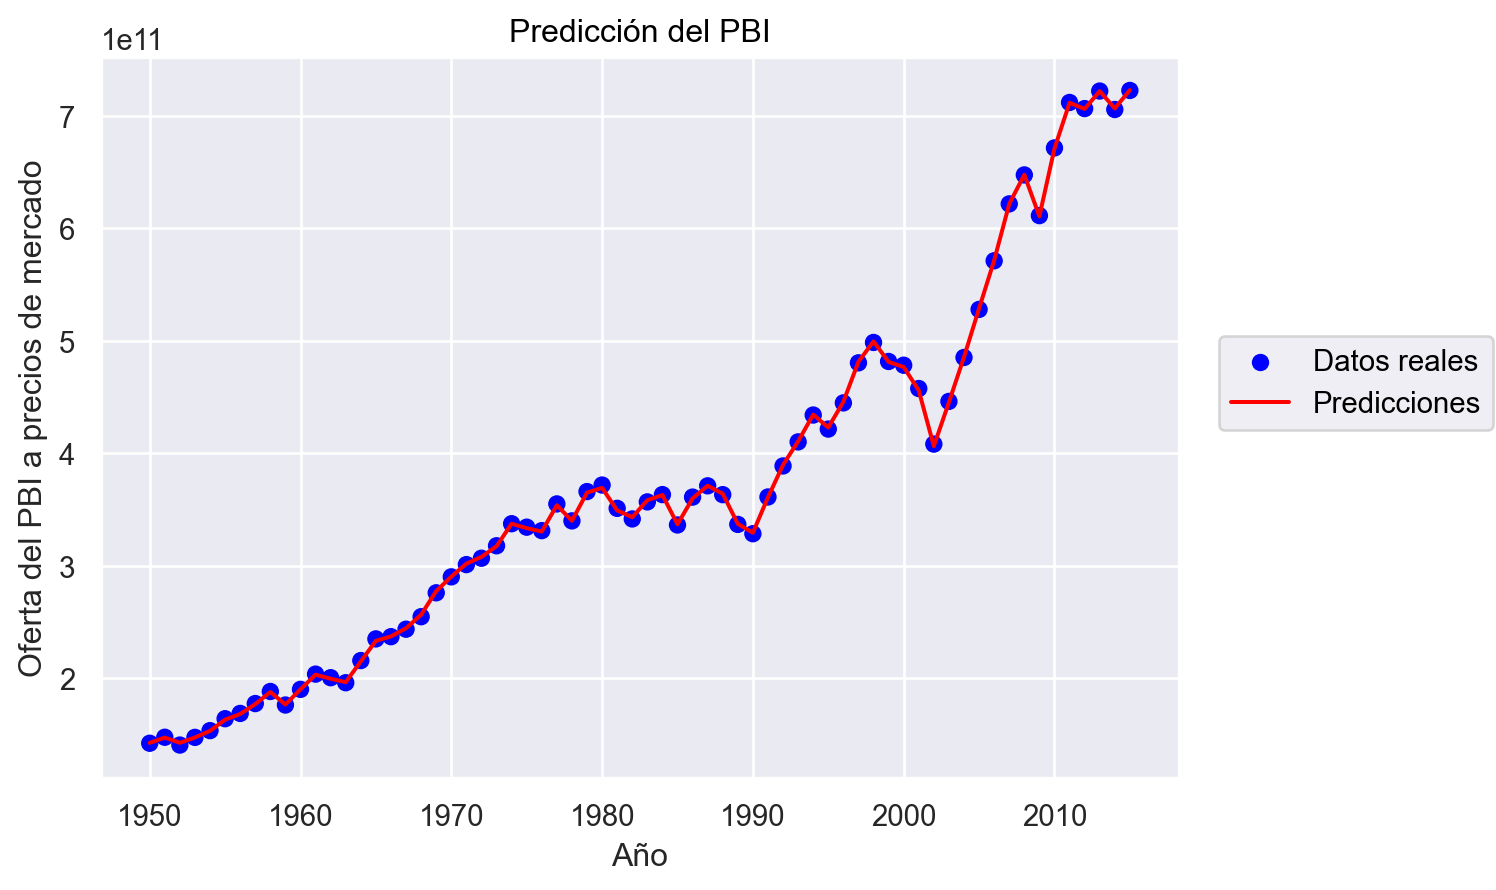

In [53]:
(
    so.Plot(data= df_oferta, x = df_oferta.index)
    .add(so.Dot(color = "blue"), y=df_oferta['PBI_a_precios_de_mercado.oferta'].values, label = "Datos reales")
    .add(so.Line(color = "red"), y=y_pred, label = "Predicciones")
).label(y="Oferta del PBI a precios de mercado",x="Año",title="Predicción del PBI")

La predicción que hicimos es prácticamente perfecta. Cómo deberíamos interpretar esto? Es cierto que tenemos muchisimas variables predictoras... Será que la y es directamente **combinación lineal** de las otras? *Preguntar*

## Ejercicio 17 - MinMax

La función que buscamos es:
$$f(x)=\frac{x-2}{3}$$

## Ejercicio 18 - Preprocesamiento

In [54]:
basketball = pd.read_csv("../../datos/CollegeBasketballPlayers2009-2021.csv")
basketball.head()

C:\Users\Fausto\AppData\Local\Temp\ipykernel_18000\14307274.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  basketball = pd.read_csv("../../datos/CollegeBasketballPlayers2009-2021.csv")


player_name           team conf  GP  Min_per   Ortg   usg   eFG  \
0    DeAndrae Ross  South Alabama   SB  26     29.5   97.3  16.6  42.5   
1    Pooh Williams       Utah St.  WAC  34     60.9  108.3  14.9  52.4   
2    Jesus Verdejo  South Florida   BE  27     72.0   96.2  21.8  45.7   
3  Mike Hornbuckle     Pepperdine  WCC  30     44.5   97.7  16.0  53.6   
4    Anthony Brown        Pacific   BW  33     56.2   96.5  22.0  52.8   

   TS_per  ORB_per  ...     dgbpm    oreb    dreb    treb     ast     stl  \
0   44.43      1.6  ... -1.941150  0.1923  0.6154  0.8077  1.1923  0.3462   
1   54.48      3.8  ... -0.247934  0.6765  1.2647  1.9412  1.8235  0.4118   
2   47.98      2.1  ... -0.883163  0.6296  2.3333  2.9630  1.9630  0.4815   
3   53.69      4.1  ... -0.393459  0.7000  1.4333  2.1333  1.1000  0.5667   
4   54.31      8.3  ... -0.668318  1.4242  3.3030  4.7273  0.8485  0.4545   

      blk      pts  Unnamed: 64  Unnamed: 65  
0  0.0385   3.8846          NaN      6.22026  
1  0.2353   5.9412          NaN      3.94375  
2  0.0000  12.1852          NaN     10.92680  
3  0.1333   4.9333          NaN      6.77427  
4  0.3333   7.5758          NaN      0.00000  

[5 rows x 66 columns]

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame

El ejercicio está hecho en el Notebook de la Clase 14